In [43]:
import numpy as np

In [44]:
import pandas as pd

In [45]:
import seaborn as sns

In [46]:
import matplotlib.pyplot as plt

In [47]:
patient_data = pd.read_csv('diabetes2.csv')

## Analysing and Visualizing

In [48]:
patient_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [49]:
patient_data['Outcome'].unique()

array([1, 0], dtype=int64)

In [50]:
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [51]:
patient_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


<AxesSubplot:xlabel='Outcome', ylabel='count'>

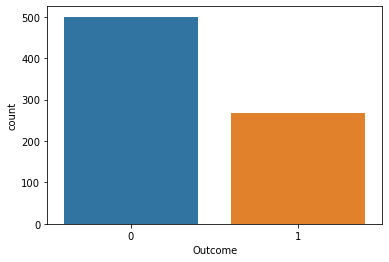

In [52]:
# displaying the number of patients with and without diabetes
sns.countplot(x='Outcome', data=patient_data)


<AxesSubplot:>

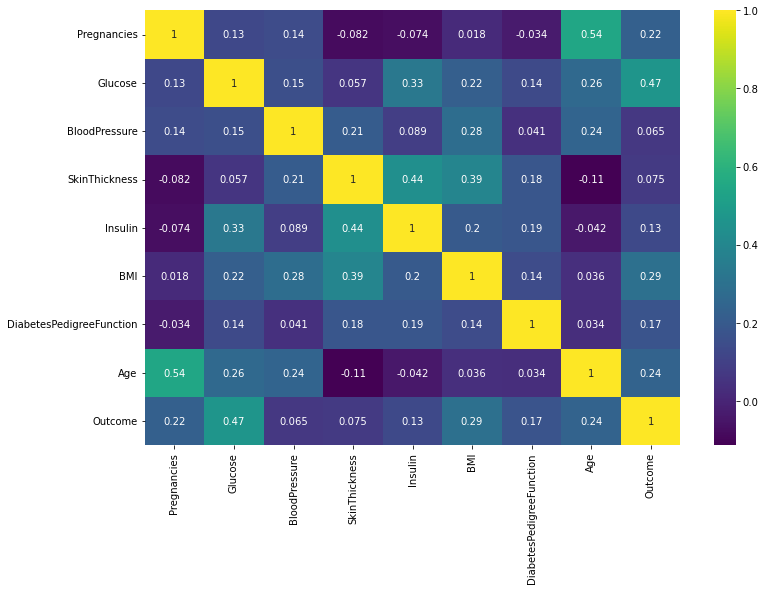

In [53]:
# heat map to show co-relation
plt.figure(figsize=(12,8))
sns.heatmap(patient_data.corr(),cmap='viridis',annot=True)

# Data Preprocessing

C:\Users\Dilan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pregnancies'>

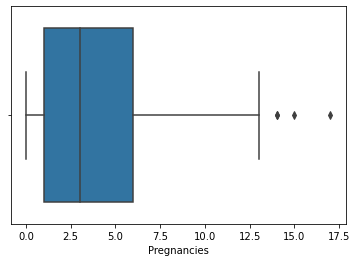

In [54]:
# visualyzing the outlier of the pregnancy column
sns.boxplot(patient_data['Pregnancies'])

In [55]:
patient_data[patient_data['Pregnancies'] > 12.5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
28,13,145,82,19,110,22.2,0.245,57,0
72,13,126,90,0,0,43.4,0.583,42,1
86,13,106,72,54,0,36.6,0.178,45,0
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
274,13,106,70,0,0,34.2,0.251,52,0
298,14,100,78,25,184,36.6,0.412,46,1
323,13,152,90,33,29,26.8,0.731,43,1
357,13,129,0,30,0,39.9,0.569,44,1
455,14,175,62,30,0,33.6,0.212,38,1


In [56]:
# Replacing the outliers of the pregnancy column with "mean"
patient_data["Pregnancies"] = np.where(patient_data["Pregnancies"] > 12.5, 4, patient_data['Pregnancies'])

In [57]:
# checking the zero value in the data-frame
patient_data[(patient_data['Glucose']==0) | (patient_data['BloodPressure']==0) | (patient_data['SkinThickness']==0) | (patient_data['BMI']==0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


Replacing all the zero value with the mean value

In [58]:
patient_data['Glucose'] = patient_data['Glucose'].replace(0,121)

In [59]:
patient_data['BloodPressure'] = patient_data['BloodPressure'].replace(0,69)

In [60]:
patient_data['SkinThickness'] = patient_data['SkinThickness'].replace(0,21)

In [61]:
patient_data['BMI'] = patient_data['BMI'].replace(0,32)

In [62]:
patient_data[(patient_data['Glucose']==0) | (patient_data['BloodPressure']==0) | (patient_data['SkinThickness']==0) | (patient_data['BMI']==0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


# Train | Test Split and Scaling

In [63]:
# Feature Engineering 

X = patient_data.drop('Outcome', axis=1)
y = patient_data['Outcome']

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [65]:
# Calling of train_test_split providing 0.3% of data for testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [66]:
scaler = StandardScaler()

In [67]:
# Scaling the X_train and X_test to normalize the data

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Logistic Regression Model

In [68]:
from sklearn.linear_model import LogisticRegressionCV 

In [69]:
diabetes_log_model = LogisticRegressionCV()

In [70]:
# Fitting the scaled X_train and y_train into Logistic Regression Model

diabetes_log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

In [71]:
diabetes_log_model.C_

array([0.35938137])

In [72]:
# Displaying the optimal parameters of the model

diabetes_log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [73]:
# Displaying the Coefficient

diabetes_log_model.coef_

array([[ 0.38865342,  1.11851029, -0.17663708,  0.03131109, -0.1319714 ,
         0.58402515,  0.3007145 ,  0.19958427]])

# Performance Evaluation


In [74]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [75]:
y_pred = diabetes_log_model.predict(scaled_X_test)

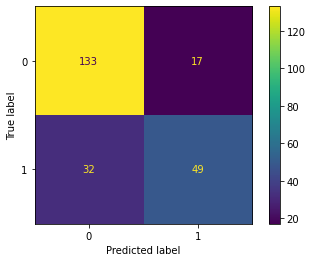

In [76]:
# Displaying the model performance through confusion metrix plot
plot_confusion_matrix(diabetes_log_model,scaled_X_test,y_test)

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.84       150
           1       0.74      0.60      0.67        81

    accuracy                           0.79       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.78      0.79      0.78       231



In [78]:
import sklearn.metrics as sm

In [79]:
# Printing accuracy of the model
accuracy = sm.accuracy_score(y_test, y_pred)

print(accuracy)

0.7878787878787878


# Performance Curve

In [80]:
from sklearn.metrics import plot_roc_curve

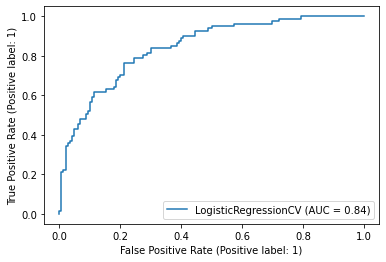

In [81]:
# Displaying ROC curve
plot_roc_curve(diabetes_log_model,scaled_X_test,y_test)